In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# 使matplotlib能够显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
nc_file = 'F:/baiduunet/0117nc/sel_china_remapcon_pr_day_BCC_historical_1975-2014_3_5_cn05grid_downscaled_nothern_sel.nc'
ds = xr.open_dataset(nc_file)
ds

<xarray.Dataset>
Dimensions:  (lon: 161, lat: 102, time: 3680)
Coordinates:
  * lon      (lon) float32 90.0 90.25 90.5 90.75 ... 129.2 129.5 129.8 130.0
  * lat      (lat) float32 30.0 30.25 30.5 30.75 31.0 ... 54.5 54.75 55.0 55.25
  * time     (time) object 1975-03-01 12:00:00 ... 2014-05-31 12:00:00
Data variables:
    pr       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Mon Nov 06 11:05:22 2023: cdo sellonlatbox,90,130,30,60 sel...
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [3]:
weights = np.cos(np.deg2rad(ds.lat))

In [4]:
# weighted average
ds_weighted = ds.weighted(weights)
ds_weighted_mean = ds_weighted.mean(('lat', 'lon'))
ds_weighted_mean

<xarray.Dataset>
Dimensions:  (time: 3680)
Coordinates:
  * time     (time) object 1975-03-01 12:00:00 ... 2014-05-31 12:00:00
Data variables:
    pr       (time) float32 0.04903 0.4211 0.03945 ... 0.1939 0.06851 0.2791

In [39]:
#筛选出plev为10000的数据
ds_weighted_mean.sel(plev=10000)

<xarray.Dataset>
Dimensions:  (time: 920)
Coordinates:
    plev     float64 1e+04
  * time     (time) object 1985-03-01 12:00:00 ... 1994-05-31 12:00:00
Data variables:
    hur      (time) float32 35.54 42.66 42.87 44.03 ... 47.36 40.15 38.57 48.78

<xarray.Dataset>
Dimensions:  (plev: 8, time: 920)
Coordinates:
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * time     (time) object 1975-03-01 12:00:00 ... 1984-05-31 12:00:00
Data variables:
    hur      (time, plev) float32 55.85 53.05 57.22 51.01 ... 49.65 44.44 44.51


In [5]:
#计算每年的平均值
ds_weighted_mean_year = ds_weighted_mean.groupby('time.year').mean('time')
print(ds_weighted_mean_year)

<xarray.Dataset>
Dimensions:  (year: 40)
Coordinates:
  * year     (year) int64 1975 1976 1977 1978 1979 ... 2010 2011 2012 2013 2014
Data variables:
    pr       (year) float32 4.063e+04 1.939 0.831 ... 4.631e+04 1.354 2.966e+05


In [42]:
#筛选出气压为10000的数据
ds_weighted_mean_year_10000 = ds_weighted_mean_year.sel(plev=10000)
ds_weighted_mean_year_10000

<xarray.Dataset>
Dimensions:  (year: 10)
Coordinates:
    plev     float64 1e+04
  * year     (year) int64 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
Data variables:
    hur      (year) float32 42.54 41.7 42.01 42.74 ... 42.33 42.47 42.54 41.59

In [6]:
#转化为dataframe并删掉plev这一列
df = ds_weighted_mean_year.to_dataframe()
# df = df.drop(['plev'],axis=1)
df

,pr
year,
1975,40632.003906
1976,1.939402
1977,0.831012
1978,8.416552
1979,0.973877
1980,100.351242
1981,1.387159
1982,0.891393
1983,1.100535


In [35]:
#输出为csv文件
df.to_csv('F:/baiduunet/0117nc/1985-1994年平均气压.csv',encoding='utf-8-sig')

In [2]:
import xarray as xr
import numpy as np


In [3]:
ds = xr.open_dataset('F:/baiduunet/0117nc/sel_china_remapcon_tas_day_BCC_historical_1975-2014_3_5_cn05grid_downscaled_nothern_sel.nc')
ds

<xarray.Dataset>
Dimensions:  (lon: 161, lat: 102, time: 3680)
Coordinates:
  * lon      (lon) float32 90.0 90.25 90.5 90.75 ... 129.2 129.5 129.8 130.0
  * lat      (lat) float32 30.0 30.25 30.5 30.75 31.0 ... 54.5 54.75 55.0 55.25
    height   float64 ...
  * time     (time) object 1975-03-01 12:00:00 ... 2014-05-31 12:00:00
Data variables:
    tas      (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Tue Oct 31 21:32:31 2023: cdo sellonlatbox,90,130,30,60 sel...
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [4]:
# 面积加权平均
weights = np.cos(np.deg2rad(ds.lat))
ds_weighted = ds.weighted(weights)
ds_weighted_mean = ds_weighted.mean(('lat', 'lon'))
ds_weighted_mean

<xarray.Dataset>
Dimensions:  (time: 3680)
Coordinates:
    height   float64 2.0
  * time     (time) object 1975-03-01 12:00:00 ... 2014-05-31 12:00:00
Data variables:
    tas      (time) float32 -7.334 -4.679 -7.847 -6.109 ... 13.86 17.85 20.34

In [5]:
temp = ds_weighted_mean['tas']
temp

<xarray.DataArray 'tas' (time: 3680)>
array([-7.334252, -4.679049, -7.847324, ..., 13.857937, 17.849804,
       20.338333], dtype=float32)
Coordinates:
    height   float64 2.0
  * time     (time) object 1975-03-01 12:00:00 ... 2014-05-31 12:00:00

In [9]:
temp_diff = temp.diff('time')
temp_diff

<xarray.DataArray 'tas' (time: 3679)>
array([ 2.6552029, -3.1682749,  1.7382841, ...,  1.5523605,  3.991867 ,
        2.4885292], dtype=float32)
Coordinates:
    height   float64 2.0
  * time     (time) object 1975-03-02 12:00:00 ... 2014-05-31 12:00:00

In [10]:
temp_diff_7d_avg = temp_diff.rolling(time=7).mean()
temp_diff_7d_avg

<xarray.DataArray 'tas' (time: 3679)>
array([        nan,         nan,         nan, ..., -1.3694992 ,
       -0.14996283,  0.17113495], dtype=float32)
Coordinates:
    height   float64 2.0
  * time     (time) object 1975-03-02 12:00:00 ... 2014-05-31 12:00:00

In [11]:
max_temp_diff = temp_diff_7d_avg.groupby('time.year').min('time')
max_temp_diff

<xarray.DataArray 'tas' (year: 40)>
array([-1.5129912, -3.3682218, -3.5410218, -5.7191863, -4.4671774,
       -4.588723 , -5.785923 , -3.8324356, -5.1122775, -4.014219 ,
       -3.5071852, -5.047956 , -5.5553675, -3.9230783, -4.9465027,
       -5.482293 , -3.805778 , -3.238279 , -4.5801315, -3.6107082,
       -4.612286 , -3.337198 , -4.8330407, -2.6747053, -4.178497 ,
       -4.080338 , -4.0788364, -2.1922252, -5.481343 , -5.6967263,
       -4.8844995, -4.0809374, -4.7589316, -3.6908915, -5.0719943,
       -4.5780597, -4.8905916, -4.01767  , -4.9418387, -3.989886 ],
      dtype=float32)
Coordinates:
    height   float64 2.0
  * year     (year) int64 1975 1976 1977 1978 1979 ... 2010 2011 2012 2013 2014

In [11]:
#输出为csv文件
consecutive_cold_days.to_dataframe().to_csv('F:/baiduunet/0117nc/1975-2014年持续冻结日数.csv',encoding='utf-8-sig')

In [ ]:
# 输出为csv文件
df = temp_year.to_dataframe()
df.to_csv('F:/baiduunet/0117nc/1975-2014年日平均降水.csv',encoding='utf-8-sig')

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('D:\gis\数据\论文\梁\数据\权重-I.csv',encoding='utf-8-sig')
df

,最大降温幅度,平均温度,连续冻结日数,负积温,连续低温日数,平均降水,平均湿度
0,-4.402422,12.267029,0,-4.735867,1,442.027066,39.604760
1,-3.717166,10.947734,0,-18.644974,3,244.872089,44.541718
2,-4.428645,11.615314,4,-11.550402,7,198.185313,46.519886
3,-5.379000,10.278201,5,-49.232872,9,220.680158,48.113914
4,-3.908249,10.351804,7,-44.955585,8,169.520213,48.478268
...,...,...,...,...,...,...,...
75,-3.163102,10.226999,0,-4.704954,1,101.648123,48.686590
76,-3.492220,11.525204,0,-7.281303,2,152.503862,45.739190
77,-5.897078,11.658710,1,-17.090363,2,332.902224,50.818554
78,-3.864240,11.165896,7,-32.373016,8,198.185313,40.050606


In [4]:
def rescale(x, type):
    if type == 1:
        return (x - min(x)) / (max(x) - min(x))
    elif type == 2:
        return (max(x) - x) / (max(x) - min(x))

In [7]:
def get_entropy_weight_1(data): # 熵权法需要使用原始数据作为输入
	data = np.array(data)
	# 数据归一化
	# 这里可以根据需要选择mean-std归一化或者min-max归一化
	
    # 计算Pij
	P = data / data.sum(axis=0) # 需要考虑分子为0的情况，可以考虑加一个epsilon=1e-3

	# 计算熵值
	E = np.nansum(-P * np.log(P) / np.log(len(data)), axis=0)

	# 计算权系数
	return (1 - E) / (1 - E).sum()




In [8]:
get_entropy_weight_1(df)

array([5.84244442e-02, 2.90541480e-03, 1.88193960e-03, 1.57964575e-03,
       7.50742751e-04, 2.17344949e-05, 9.34436078e-01])

In [6]:
print(weights)

    weight
V1     1.0
V2     1.0
V3     1.0
V4     1.0
V5     1.0
V6     1.0
V7     1.0


In [1]:
import xarray as xr
import numpy as np
import rasterio
from rasterio.transform import from_origin
from rasterio.enums import Resampling

In [2]:
data = xr.open_dataset("D:\hur_day_BCC_ssp585_2015-2024_I_test.nc")
data

<xarray.Dataset>
Dimensions:  (lon: 161, lat: 102, plev: 8, time: 920)
Coordinates:
  * lon      (lon) float32 90.0 90.25 90.5 90.75 ... 129.2 129.5 129.8 130.0
  * lat      (lat) float32 30.0 30.25 30.5 30.75 31.0 ... 54.5 54.75 55.0 55.25
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * time     (time) object 2015-03-01 12:00:00 ... 2024-05-31 12:00:00
Data variables:
    hur      (time, plev, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Thu Jan 25 15:21:40 2024: cdo sellonlatbox,90,130,30,60 cn0...
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [3]:
hur = data['hur']
hur

<xarray.DataArray 'hur' (time: 920, plev: 8, lat: 102, lon: 161)>
[120865920 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 90.0 90.25 90.5 90.75 ... 129.2 129.5 129.8 130.0
  * lat      (lat) float32 30.0 30.25 30.5 30.75 31.0 ... 54.5 54.75 55.0 55.25
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * time     (time) object 2015-03-01 12:00:00 ... 2024-05-31 12:00:00
Attributes:
    standard_name:  relative_humidity
    long_name:      Relative Humidity
    units:          %
    comment:        The relative humidity with respect to liquid water for T>...
    original_name:  RELHUM
    cell_methods:   time: mean (interval: 5 minutes)
    cell_measures:  area: areacella
    pyproj_srs:     +proj=longlat +datum=WGS84 +no_defs

In [5]:
# 计算每十年的平均值
hur_year = hur.resample(time='10YE').mean(dim='time')
hur_year

<xarray.DataArray 'hur' (time: 2, plev: 8, lat: 102, lon: 161)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 90.0 90.25 90.5 90.75 ... 129.2 129.5 129.8 130.0
  * lat      (lat) float32 30.0 30.25 30.5 30.75 31.0 ... 54.5 54.75 55.0 55.25
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * time     (time) object 2015-12-31 00:00:00 2025-12-31 00:00:00
Attributes:
    standard_name:  relative_humidity
    long_name:      Relative Humidity
    units:          %
    comment:        The relative humidity with respect to liquid water for T>...
    original_name:  RELHUM
    cell_methods:   time: mean (interval: 5 minutes)
    cell_measures:  area: areacella
    pyproj_srs:     +proj=longlat +datum=WGS84 +no_defs

In [13]:
# 得出plev为10000的数据
hur_year_10000 = hur_year.sel(plev=10000)
hur_year_10000
# 删除plev变量
hur_year_10000 = hur_year_10000.drop_vars('plev')
hur_year_10000
# 只要第一个时间点的数据
hur_year_10000 = hur_year_10000.isel(time=0)
hur_year_10000

<xarray.DataArray 'hur' (lat: 102, lon: 161)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float32 90.0 90.25 90.5 90.75 ... 129.2 129.5 129.8 130.0
  * lat      (lat) float32 30.0 30.25 30.5 30.75 31.0 ... 54.5 54.75 55.0 55.25
    time     object 2015-12-31 00:00:00
Attributes:
    standard_name:  relative_humidity
    long_name:      Relative Humidity
    units:          %
    comment:        The relative humidity with respect to liquid water for T>...
    original_name:  RELHUM
    cell_methods:   time: mean (interval: 5 minutes)
    cell_measures:  area: areacella
    pyproj_srs:     +proj=longlat +datum=WGS84 +no_defs

In [15]:
# 得出左上角坐标
lat = 90
lon = 70
# 得出像元大小
res = 0.5   
# 得出行列数
rows, cols = hur_year.shape
hur_year.shape
# 得出变换参数
# transform = from_origin(lon, lat, res, res)
# # 得出输出文件
# dst_file = "D:\hur_year.tif"
# # 写入文件
# with rasterio.open(dst_file, 'w', driver='GTiff', height=rows, width=cols, count=1, dtype=hur_year.dtype, crs='+proj=latlong', transform=transform) as dst:
#     dst.write(hur_year.values, 1)

ValueError: too many values to unpack (expected 2)

In [8]:
import pandas as pd
import numpy as np

In [10]:
data = pd.read_excel('D:\gis\数据\论文\梁\数据\lianxu.xlsx')
data

,连续冻结日数
0,0
1,0
2,4
3,5
4,7
...,...
75,0
76,0
77,1
78,7


In [11]:
# 只选择第一列并转为numpy数组
data = data.iloc[:,0].values
data

array([ 0,  0,  4,  5,  7,  4,  0, 20,  0, 13, 20, 11,  6, 12, 12,  8,  7,
        0,  1, 14,  5, 10,  6, 16,  0,  6,  9,  9,  7, 13, 14,  0,  0,  5,
        0,  2,  2,  6,  8,  8,  0, 16,  0,  9, 15,  6,  0,  7,  4,  1,  0,
        0,  1, 15,  4,  0,  0,  8, 26, 12,  3,  7,  0,  7,  0,  0, 13,  9,
        0,  1,  4, 16,  0,  6,  0,  0,  0,  1,  7,  6], dtype=int64)

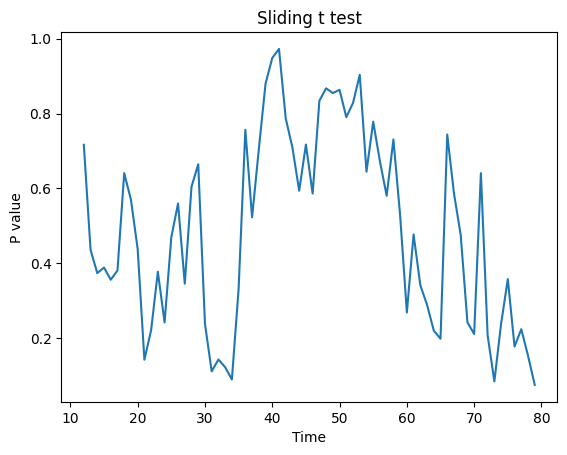

In [19]:
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc_params
config = {
    "font.family":'Times New Roman',
    "font.size": 12,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}


def sliding_t_test(data,window_size):
  n = len(data)
  p_values = []
  for i in range(n - window_size + 1):
    group1 = data[i:i + window_size]
    group2 = data[i + window_size:]
    t_stat, p_value = ttest_ind(group1, group2)
    p_values.append(p_value)
  return p_values

data = pd.read_excel('D:\gis\数据\论文\梁\数据\lianxu.xlsx')
data = data.iloc[:,0].values

window_size = 12
p_values = sliding_t_test(data, window_size)

plt.plot(range(window_size, len(data)+1), p_values)
plt.xlabel('Time')
plt.ylabel('P value')
plt.title('Sliding t test')
plt.show()

In [20]:
import pandas as pd

# 示例数据
data = [1, 3, 5, 7, 9, 11, 13, 15]

# 滑动窗口大小
window_size = 3

# 计算滑动平均
rolling_mean = pd.Series(data).rolling(window=window_size).mean()

# 不填充
rolling_mean_no_fill = rolling_mean

# 使用前面几天的数据填充
rolling_mean_fill_with_data = rolling_mean.fillna(method='ffill')

# 使用移动平均填充
rolling_mean_fill_with_ma = rolling_mean.fillna(rolling_mean.mean())

# 打印结果
print(rolling_mean_no_fill)
print(rolling_mean_fill_with_data)
print(rolling_mean_fill_with_ma)


0     NaN
1     NaN
2     3.0
3     5.0
4     7.0
5     9.0
6    11.0
7    13.0
dtype: float64
0     NaN
1     NaN
2     3.0
3     5.0
4     7.0
5     9.0
6    11.0
7    13.0
dtype: float64
0     8.0
1     8.0
2     3.0
3     5.0
4     7.0
5     9.0
6    11.0
7    13.0
dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_3520\853811663.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rolling_mean_fill_with_data = rolling_mean.fillna(method='ffill')


In [1]:
import xarray as xr
import numpy as np


ds = xr.open_dataset("D:\\1tas_day_BCC_ssp126_2015-2100_I.nc")
weights = np.cos(np.deg2rad(ds.lat))
ds_weighted = ds.weighted(weights)
ds_weighted_mean = ds_weighted.mean(('lat', 'lon'))
temp = ds_weighted_mean['tas']
temp_3d_avg = temp.rolling(time=7).mean()
temp_3d_avg
# cold_days = temp_3d_avg.where(temp_3d_avg<0)
# cold_days = cold_days.groupby('time.year').count('time')
# df = cold_days.to_dataframe()
# df.to_csv('F:/baiduunet/0117nc/1975-2014年平均连续低温天数',encoding='utf-8-sig')

<xarray.DataArray 'tas' (time: 7912)>
array([      nan,       nan,       nan, ..., 19.054214, 16.95843 ,
       15.989655], dtype=float32)
Coordinates:
    height   float64 2.0
  * time     (time) object 2015-03-01 12:00:00 ... 2100-05-31 12:00:00

In [7]:
import xarray as xr
import numpy as np
import rasterio as rio
from rasterio.transform import from_origin

In [14]:
data = xr.open_dataset("D:\\1tas_day_BCC_ssp126_2015-2100_I.nc")
##data
print(data.coords)

Coordinates:
  * lon      (lon) float32 90.0 90.25 90.5 90.75 ... 129.2 129.5 129.8 130.0
  * lat      (lat) float32 30.0 30.25 30.5 30.75 31.0 ... 54.5 54.75 55.0 55.25
    height   float64 ...
  * time     (time) object 2015-03-01 12:00:00 ... 2100-05-31 12:00:00


In [9]:
# 计算年平均tas
tas = data['tas']
tas_year = tas.resample(time='Y').mean(dim='time')
tas_year
print(tas_year)

<string>:6: FutureWarning: 'Y' is deprecated and will be removed in a future version. Please use 'YE' instead of 'Y'.


<xarray.DataArray 'tas' (time: 86, lat: 102, lon: 161)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ...

In [10]:
lon_values = tas_year.coords['lon'].values
lat_values = tas_year.coords['lat'].values
lon_values
lat_values

array([30.  , 30.25, 30.5 , 30.75, 31.  , 31.25, 31.5 , 31.75, 32.  ,
       32.25, 32.5 , 32.75, 33.  , 33.25, 33.5 , 33.75, 34.  , 34.25,
       34.5 , 34.75, 35.  , 35.25, 35.5 , 35.75, 36.  , 36.25, 36.5 ,
       36.75, 37.  , 37.25, 37.5 , 37.75, 38.  , 38.25, 38.5 , 38.75,
       39.  , 39.25, 39.5 , 39.75, 40.  , 40.25, 40.5 , 40.75, 41.  ,
       41.25, 41.5 , 41.75, 42.  , 42.25, 42.5 , 42.75, 43.  , 43.25,
       43.5 , 43.75, 44.  , 44.25, 44.5 , 44.75, 45.  , 45.25, 45.5 ,
       45.75, 46.  , 46.25, 46.5 , 46.75, 47.  , 47.25, 47.5 , 47.75,
       48.  , 48.25, 48.5 , 48.75, 49.  , 49.25, 49.5 , 49.75, 50.  ,
       50.25, 50.5 , 50.75, 51.  , 51.25, 51.5 , 51.75, 52.  , 52.25,
       52.5 , 52.75, 53.  , 53.25, 53.5 , 53.75, 54.  , 54.25, 54.5 ,
       54.75, 55.  , 55.25], dtype=float32)

In [12]:
res = 0.25
rows, cols = tas_year[0].shape

transform = from_origin(lon_values[0], lat_values[-1], res, res)
dst_file = "D:\\tas_year.tif"
with rio.open(dst_file, 'w', driver='GTiff', height=rows, width=cols, count=1, dtype=tas_year.dtype, crs='+proj=latlong', transform=transform) as dst:
    dst.write(tas_year[0].values, 1)

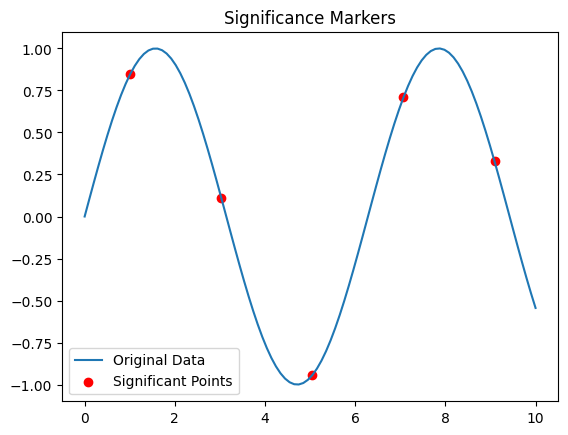

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 创建示例数据
x = np.linspace(0, 10, 100)
y = np.sin(x)

# 创建显著性标记数据
significant_indices = [10, 30, 50, 70, 90]
significant_values = [y[i] for i in significant_indices]

# 绘制原始数据
plt.plot(x, y, label='Original Data')

# 在显著性点处添加标记
plt.scatter(x[significant_indices], significant_values, color='red', label='Significant Points')

# 添加图例和标题
plt.legend()
plt.title('Significance Markers')

# 显示图表
plt.show()


In [18]:
from scipy.stats import bartlett, levene

# 示例数据
group1 = [10, 12, 15, 11, 13]
group2 = [9, 11, 14, 10, 12]
group3 = [8, 10, 13, 9, 11]

# Bartlett检验
bartlett_statistic, bartlett_pvalue = bartlett(group1, group2, group3)
print("Bartlett检验结果：")
print("Statistic:", bartlett_statistic)
print("P-value:", bartlett_pvalue)

# Levene检验
levene_statistic, levene_pvalue = levene(group1, group2, group3)
print("\nLevene检验结果：")
print("Statistic:", levene_statistic)
print("P-value:", levene_pvalue)




Bartlett检验结果：
Statistic: 0.0
P-value: 1.0

Levene检验结果：
Statistic: 0.0
P-value: 1.0
